
Confusion Matrix:
 [[23  7]
 [ 9  1]]

Accuracy: 0.60
Precision: 0.12
Recall: 0.10
F1 Score: 0.11


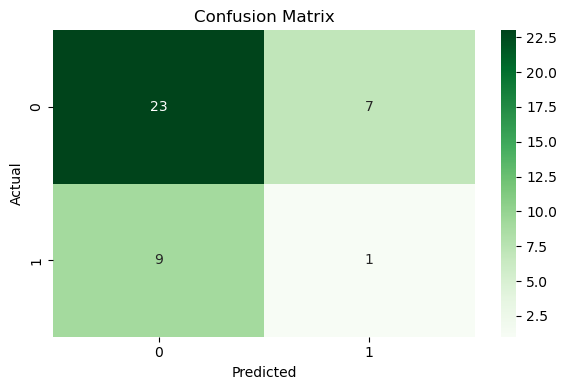

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

heart_data = pd.read_csv("C:/Users/LENOVO/Downloads/New folder/heart_disease.csv")
heart_data.dropna(inplace=True)

if heart_data['Gender'].dtype == 'object':
    heart_data['Gender'] = heart_data['Gender'].map({'Male': 1, 'Female': 0})
if heart_data['Heart_Disease'].dtype == 'object':
    heart_data['Heart_Disease'] = heart_data['Heart_Disease'].map({'Yes': 1, 'No': 0})

features = ['Age', 'Cholesterol', 'Blood_Pressure']
X = heart_data[features]
y = heart_data['Heart_Disease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\nConfusion Matrix:\n", conf_matrix)
print(f"\nAccuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
